In [1]:
# load in the libraries we will use
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
import visuals as vs
%matplotlib inline

C:\Users\jmaxi.LSUMC-MASTER\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Users\jmaxi.LSUMC-MASTER\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jmaxi.LSUMC-MASTER\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module 

In [2]:
train = pd.read_csv('houseTrain.csv')
test = pd.read_csv('houseTest.csv')
print len(train)
print len(test)

1460
1459


In [3]:
# First split the training data into the features and the target
features = train.drop('SalePrice', axis=1)
target = train.SalePrice

In [4]:
# Let's turn the above into a function
def missing_data_info(df):
    '''
    Takes: a pandas dataframe which is checked for missing data in the columns. Uses any() method to check for 
           missing data.
           
    Returns: prints out the name of columns with missing data, the number of missing values, and the dtype of the column
             and returns a dictionary of the printed data in the form column_name: [#_missing_values, col_dtype]'''
    nan_columns = df.columns[pd.isnull(df).any()].tolist()
    nan_dict = {}
    for i in nan_columns:
        print '{0}: {1} {2}'.format(i, df[i].isnull().sum(), features[i].dtypes)
        nan_dict[i] = [df[i].isnull().sum(), features[i].dtypes]
    return nan_dict

In [5]:
def graph_mean_on_scatter(df, x_name, y_name):
    '''
    Input:
            df: the pandas data frame the data is contained in
            x_name: the name of the df column to plot on the x-axis
            y_name: the name of the df column to plot on the y-axis
    Dependencies: 
            import seaborn as sns
            import numpy as np
            import matplotlib.pyplot as plt
    Returns: 
            A regplot which has any missing values plotted separately in order to evaluate the usefullness of 
            substituting in the mean for the missing data.'''
    missing = pd.DataFrame(data=df[x_name][df[x_name].isnull()], columns=[x_name])
    missing[y_name] = df[y_name][df[x_name].isnull()]
    missing[x_name].fillna(value=np.nanmean(df[x_name]), inplace=True)
    
    sns.regplot(x=x_name, y=y_name, data=df)
    plt.plot(missing[x_name], missing[y_name], 's')
    plt.show()
    return

Some of the code below comes from:
https://www.kaggle.com/xchmiao/house-prices-advanced-regression-techniques/detailed-data-exploration-in-python

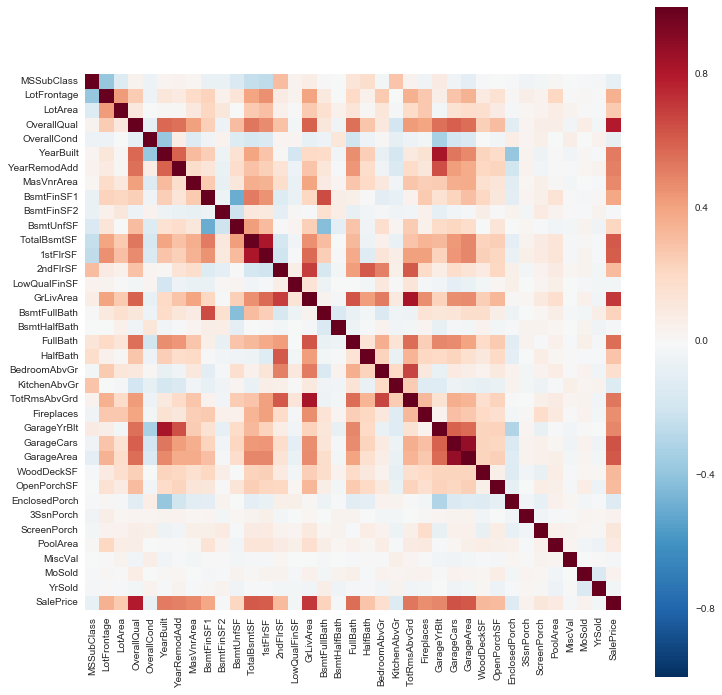

In [6]:
corr = train.select_dtypes(include= ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmax=1, square=True)

In [7]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print 'List the numerical features decendingly by their correlations with Sale Price:\n'
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print "{0}: \t{1}".format(*ele)

List the numerical features decendingly by their correlations with Sale Price:

OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
GarageYrBlt: 	0.486361677488
MasVnrArea: 	0.477493047096
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
LotFrontage: 	0.351799096571
WoodDeckSF: 	0.324413444568
2ndFlrSF: 	0.319333802832
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
MSSubClass: 	-0.0842841351266
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
LowQualFinSF: 	-0.

In [8]:
features = train[['OverallQual', 'GrLivArea']]
prices = train.SalePrice

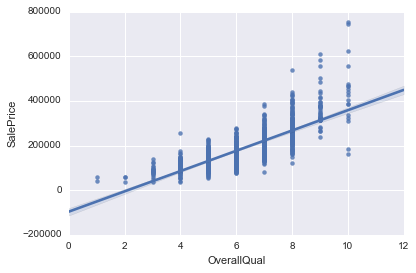

In [9]:
sns.regplot(x='OverallQual', y='SalePrice', data=train)

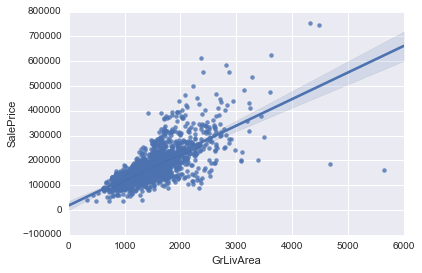

In [10]:
sns.regplot(x='GrLivArea', y='SalePrice', data=train)

In [11]:
missing_data_info(features)

{}

In [12]:
test_features = test[['OverallQual', 'GrLivArea']]
missing_data_info(test_features)

{}

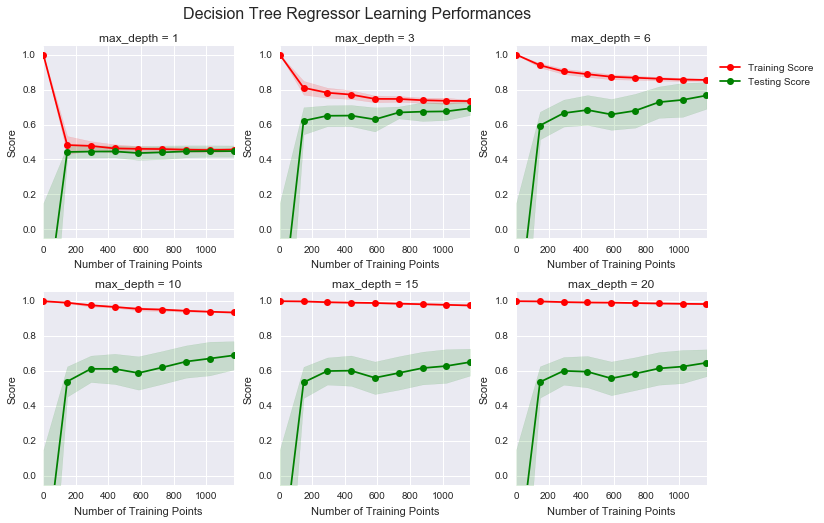

In [14]:
vs.ModelLearning(features, prices)

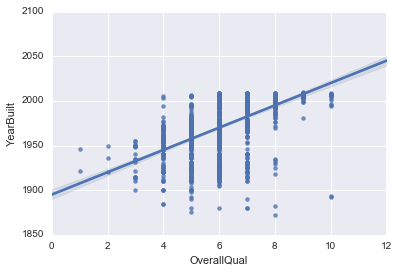

In [15]:
sns.regplot(x='OverallQual', y='YearBuilt', data=train)